<a href="https://colab.research.google.com/github/ranjithkumar98788/Machine-Learning-projects/blob/main/Credit_risk_assessment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for lxml
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (lxml)


In [ ]:
!kaggle datasets download -d abhirajmandal/credit-risk-modelling-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/abhirajmandal/credit-risk-modelling-dataset
License(s): apache-2.0
 79% 13.0M/16.5M [00:00<00:00, 58.6MB/s]
100% 16.5M/16.5M [00:00<00:00, 55.5MB/s]


## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import warnings

#import os


## Reading the datasets

In [ ]:
a1 = pd.read_excel('/content/case_study1.xlsx')
a2 = pd.read_excel('/content/case_study2.xlsx')

In [ ]:
df1 = a1.copy()
df2 = a2.copy()

In [ ]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [ ]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


# Data Preprocessing:

## Removing null values in Df1:

In [ ]:
df1.replace(-99999, np.nan, inplace=True)

null_counts = df1.isnull().sum()
null_counts

,0
PROSPECTID,0
Total_TL,0
Tot_Closed_TL,0
Tot_Active_TL,0
Total_TL_opened_L6M,0
Tot_TL_closed_L6M,0
pct_tl_open_L6M,0
pct_tl_closed_L6M,0
pct_active_tl,0
pct_closed_tl,0


In [ ]:
df1['Age_Newest_TL'] = df1['Age_Newest_TL'].fillna(df1['Age_Newest_TL'].mean())
df1['Age_Oldest_TL'] = df1['Age_Oldest_TL'].fillna(df1['Age_Oldest_TL'].mean())

In [ ]:
null_counts = df1.isnull().sum()
null_counts

,0
PROSPECTID,0
Total_TL,0
Tot_Closed_TL,0
Tot_Active_TL,0
Total_TL_opened_L6M,0
Tot_TL_closed_L6M,0
pct_tl_open_L6M,0
pct_tl_closed_L6M,0
pct_active_tl,0
pct_closed_tl,0


In [ ]:
df1.shape

(51336, 26)

## Removing null values in Df2:

In [ ]:
counts = {}
for i in df2.columns:
    counts[i] = (df2[i] == -99999).sum()
    if counts[i] > 0:
        print(f"Column '{i}' has {counts[i]} occurrences of -99999")

max_count_column = max(counts, key=counts.get)
print(f"Column with maximum occurrences of -99999: {max_count_column}")
min_count_column = min(counts, key=counts.get)
print(f"Column with minimum occurrences of -99999: {min_count_column}")

Column 'time_since_recent_payment' has 4291 occurrences of -99999
Column 'time_since_first_deliquency' has 35949 occurrences of -99999
Column 'time_since_recent_deliquency' has 35949 occurrences of -99999
Column 'max_delinquency_level' has 35949 occurrences of -99999
Column 'max_deliq_6mts' has 12890 occurrences of -99999
Column 'max_deliq_12mts' has 10832 occurrences of -99999
Column 'tot_enq' has 6321 occurrences of -99999
Column 'CC_enq' has 6321 occurrences of -99999
Column 'CC_enq_L6m' has 6321 occurrences of -99999
Column 'CC_enq_L12m' has 6321 occurrences of -99999
Column 'PL_enq' has 6321 occurrences of -99999
Column 'PL_enq_L6m' has 6321 occurrences of -99999
Column 'PL_enq_L12m' has 6321 occurrences of -99999
Column 'time_since_recent_enq' has 6321 occurrences of -99999
Column 'enq_L12m' has 6321 occurrences of -99999
Column 'enq_L6m' has 6321 occurrences of -99999
Column 'enq_L3m' has 6321 occurrences of -99999
Column 'pct_currentBal_all_TL' has 72 occurrences of -99999
Colu

In [ ]:
df2.shape

(51336, 62)

### Dropping columns which has more than 10000 null values.

In [ ]:
counts_dict = {}
for i in df2.columns:
    counts_dict[i] = (df2[i] == -99999).sum()

for column_name, count_value in counts_dict.items():
    if count_value > 10000:
        df2 = df2.drop(column_name, axis=1)
        print(f"Column '{column_name}' has been dropped")

Column 'time_since_first_deliquency' has been dropped
Column 'time_since_recent_deliquency' has been dropped
Column 'max_delinquency_level' has been dropped
Column 'max_deliq_6mts' has been dropped
Column 'max_deliq_12mts' has been dropped
Column 'CC_utilization' has been dropped
Column 'PL_utilization' has been dropped
Column 'max_unsec_exposure_inPct' has been dropped


In [ ]:
df2.shape

(51336, 54)

In [ ]:
null_counts = df2.apply(lambda x: (x == -99999).sum())
null_counts

,0
PROSPECTID,0
time_since_recent_payment,4291
num_times_delinquent,0
max_recent_level_of_deliq,0
num_deliq_6mts,0
num_deliq_12mts,0
num_deliq_6_12mts,0
num_times_30p_dpd,0
num_times_60p_dpd,0
num_std,0


### Null values imputation for the remaining variables

In [ ]:
for col in df2.columns:
    if pd.api.types.is_numeric_dtype(df2[col]):
        mean_val = df2.loc[df2[col] != -99999, col].mean()

        df2[col] = df2[col].replace(-99999, mean_val)

In [ ]:
null_counts = df2.apply(lambda x: (x == -99999).sum())
null_counts

,0
PROSPECTID,0
time_since_recent_payment,0
num_times_delinquent,0
max_recent_level_of_deliq,0
num_deliq_6mts,0
num_deliq_12mts,0
num_deliq_6_12mts,0
num_times_30p_dpd,0
num_times_60p_dpd,0
num_std,0


# Merging the datasets:

In [ ]:
for i in list(df1.columns):
  if i in list(df2.columns):
    print(i)

PROSPECTID


In [ ]:
df = pd.merge(df1, df2, how='inner',left_on='PROSPECTID', right_on='PROSPECTID')

In [ ]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.0,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.0,0.0,0,0,AL,AL,753,P1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  51336 non-null  int64  
 1   Total_TL                    51336 non-null  int64  
 2   Tot_Closed_TL               51336 non-null  int64  
 3   Tot_Active_TL               51336 non-null  int64  
 4   Total_TL_opened_L6M         51336 non-null  int64  
 5   Tot_TL_closed_L6M           51336 non-null  int64  
 6   pct_tl_open_L6M             51336 non-null  float64
 7   pct_tl_closed_L6M           51336 non-null  float64
 8   pct_active_tl               51336 non-null  float64
 9   pct_closed_tl               51336 non-null  float64
 10  Total_TL_opened_L12M        51336 non-null  int64  
 11  Tot_TL_closed_L12M          51336 non-null  int64  
 12  pct_tl_open_L12M            51336 non-null  float64
 13  pct_tl_closed_L12M          513

In [ ]:
df.isnull().sum()

,0
PROSPECTID,0
Total_TL,0
Tot_Closed_TL,0
Tot_Active_TL,0
Total_TL_opened_L6M,0
...,...
GL_Flag,0
last_prod_enq2,0
first_prod_enq2,0
Credit_Score,0


# Visual Insights:

## 1) Lineplot between AGE and NET MONTHLY INCOME.

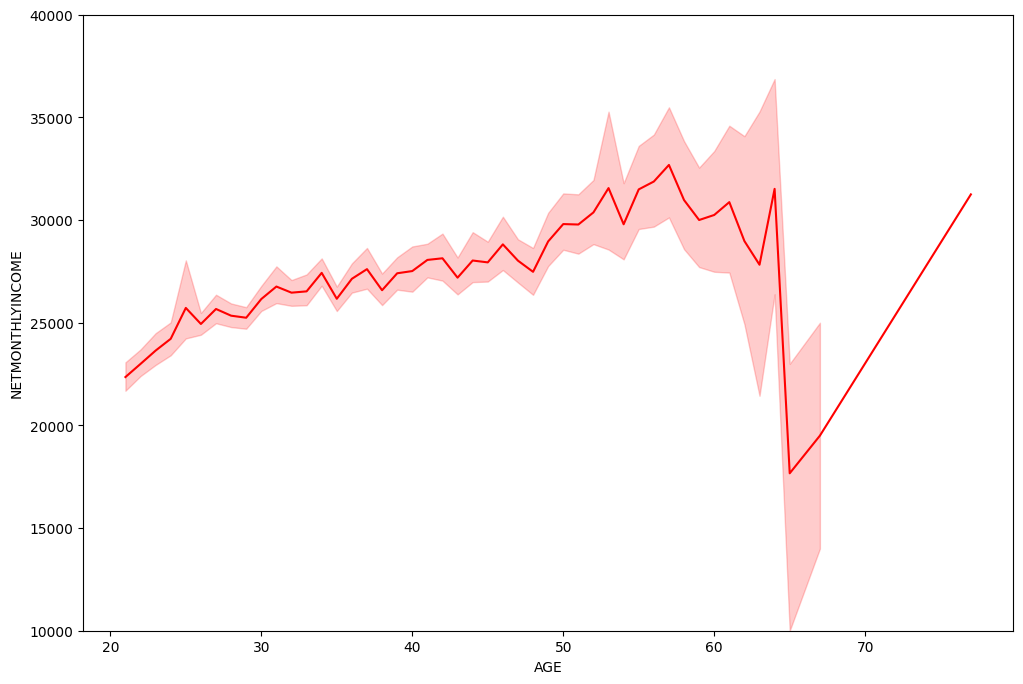

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='AGE', y='NETMONTHLYINCOME', data=df,ax=ax, color='red')
ax.set_ylim(10000, 40000)
plt.show()

## 2) Lineplot between number of times deliquent and NET MONTHLY INCOME.

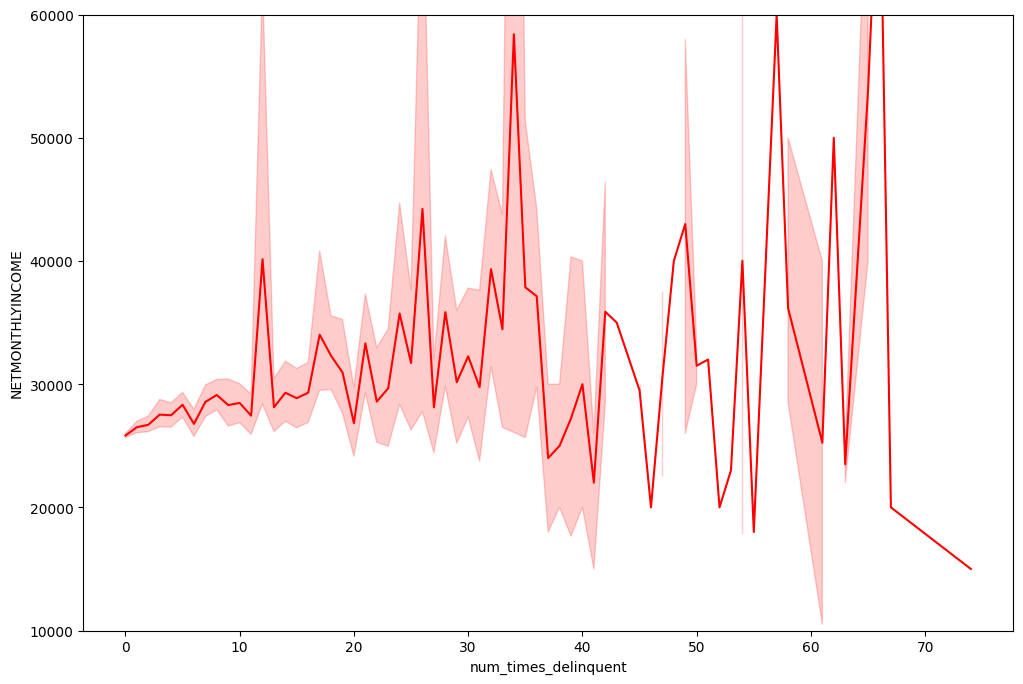

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='num_times_delinquent', y='NETMONTHLYINCOME', data=df,ax=ax, color='red')
ax.set_ylim(10000, 60000)
plt.show()

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


# Feature Engineering:

Performing feature engineering only on independent variables. That's why removing target variable

In [ ]:
features_df = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [ ]:
features_df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,1,0.0,0.0,0.0,0.0,1,0,PL,PL,696
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,685
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,0.0,0.0,0.0,0.0,1,0,ConsumerLoan,others,693
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0.0,0.0,0.0,0.0,0,0,others,others,673
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0.0,0.0,0.0,0.0,0,0,AL,AL,753


In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  51336 non-null  int64  
 1   Total_TL                    51336 non-null  int64  
 2   Tot_Closed_TL               51336 non-null  int64  
 3   Tot_Active_TL               51336 non-null  int64  
 4   Total_TL_opened_L6M         51336 non-null  int64  
 5   Tot_TL_closed_L6M           51336 non-null  int64  
 6   pct_tl_open_L6M             51336 non-null  float64
 7   pct_tl_closed_L6M           51336 non-null  float64
 8   pct_active_tl               51336 non-null  float64
 9   pct_closed_tl               51336 non-null  float64
 10  Total_TL_opened_L12M        51336 non-null  int64  
 11  Tot_TL_closed_L12M          51336 non-null  int64  
 12  pct_tl_open_L12M            51336 non-null  float64
 13  pct_tl_closed_L12M          513

## Identifying numerical and categorical features:

In [ ]:
numerical_features = []
categorical_features = []
for colx in features_df.columns:
  if features_df[colx].dtype == 'object':
    #print(colx, df[colx].nunique())
    categorical_features.append(colx)
  else:
    numerical_features.append(colx)
print('numeric features:', numerical_features)
print('categorical features:', categorical_features)

numeric features: ['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m', 'AGE', 'NETMONTHLYINCOM

### Analyzing categorical features

Value counts for MARITALSTATUS:
MARITALSTATUS
Married    37752
Single     13584
Name: count, dtype: int64



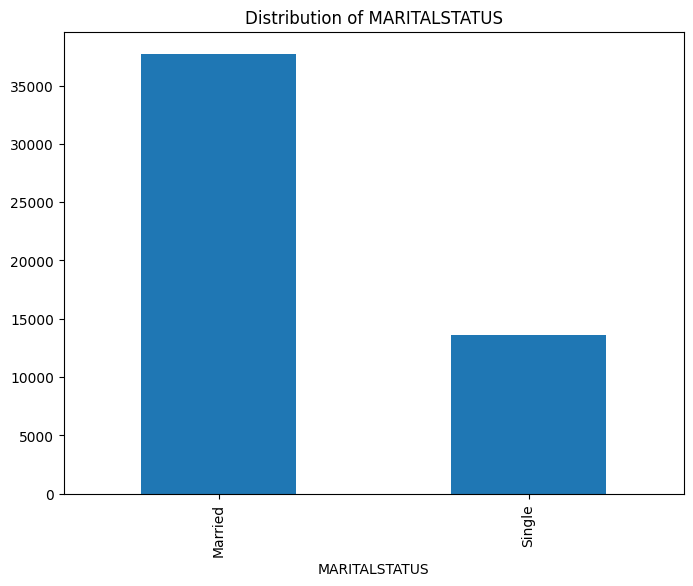

Value counts for EDUCATION:
EDUCATION
GRADUATE          16673
12TH              14467
SSC                9276
UNDER GRADUATE     5492
OTHERS             2917
POST-GRADUATE      2242
PROFESSIONAL        269
Name: count, dtype: int64



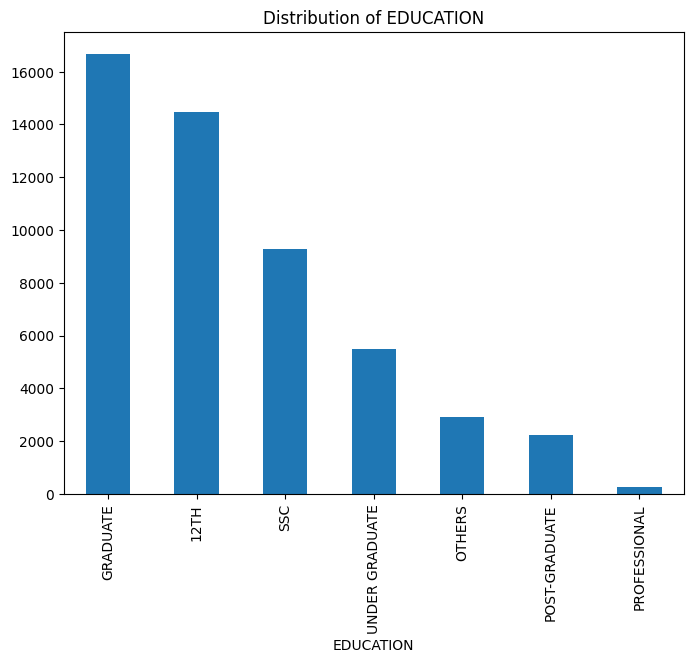

Value counts for GENDER:
GENDER
M    45245
F     6091
Name: count, dtype: int64



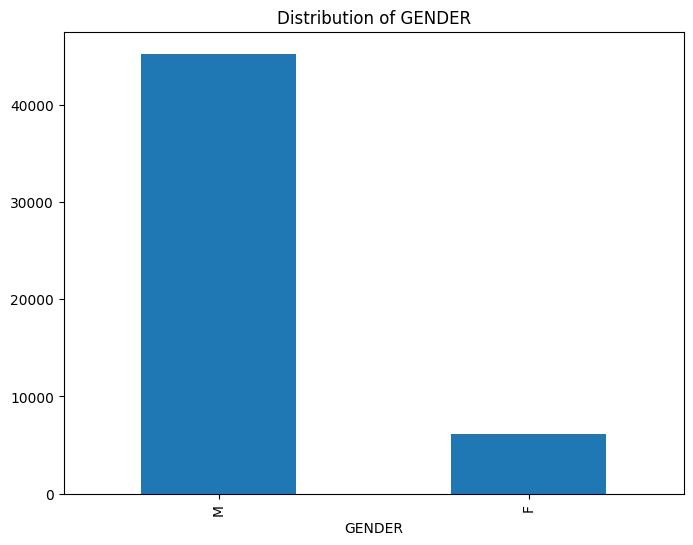

Value counts for last_prod_enq2:
last_prod_enq2
others          20831
ConsumerLoan    17793
PL               7959
CC               2339
AL               1511
HL                903
Name: count, dtype: int64



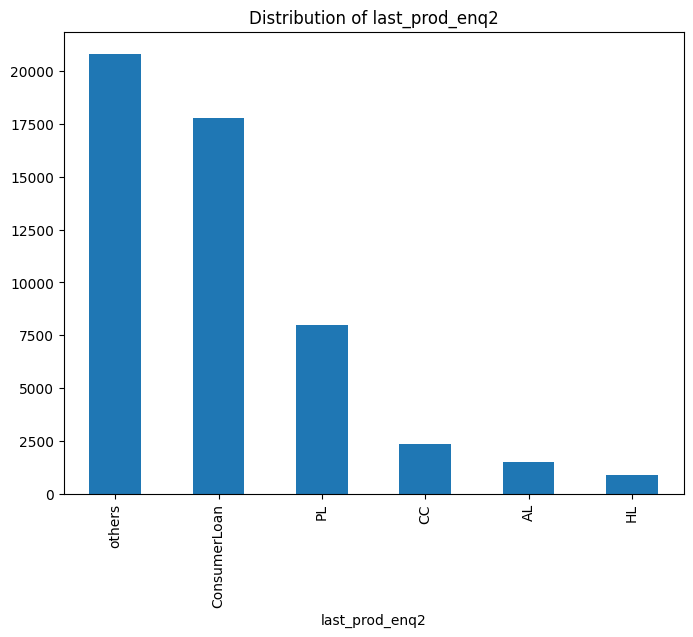

Value counts for first_prod_enq2:
first_prod_enq2
others          28120
ConsumerLoan    11860
PL               4889
AL               2870
CC               2188
HL               1409
Name: count, dtype: int64



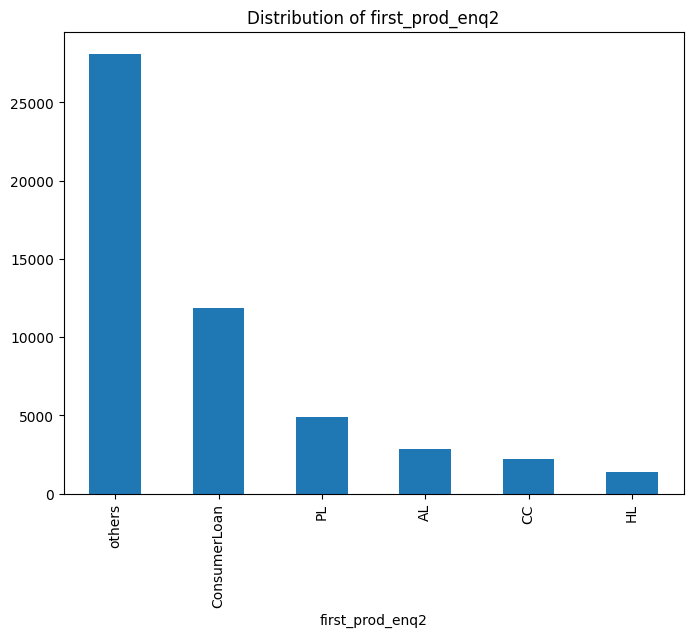

Value counts for Approved_Flag:
Approved_Flag
P2    32199
P3     7452
P4     5882
P1     5803
Name: count, dtype: int64



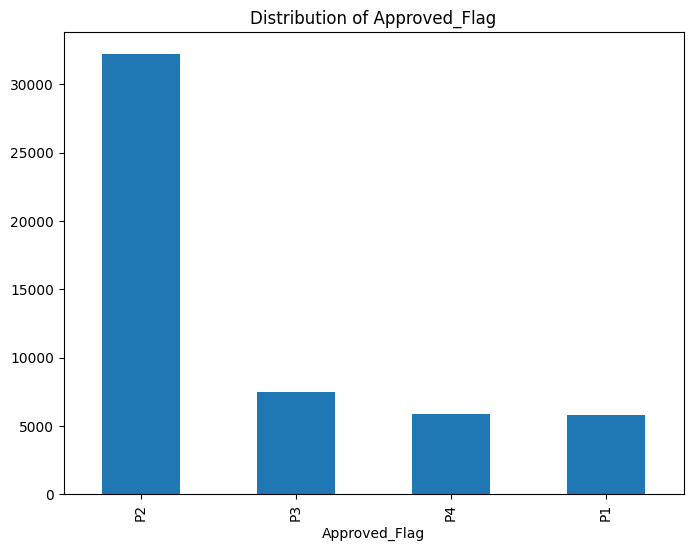

In [ ]:
categorical_features = df.select_dtypes(include='object').columns
for col in categorical_features:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")
    plt.figure(figsize=(8,6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Statistical Analysis:

### Descriptive statistics for numerical features

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns
print(df[numerical_features].describe())

         PROSPECTID      Total_TL  Tot_Closed_TL  Tot_Active_TL  \
count  51336.000000  51336.000000   51336.000000   51336.000000   
mean   25668.500000      4.858598       2.770415       2.088184   
std    14819.571046      7.177116       5.941680       2.290774   
min        1.000000      1.000000       0.000000       0.000000   
25%    12834.750000      1.000000       0.000000       1.000000   
50%    25668.500000      2.000000       1.000000       1.000000   
75%    38502.250000      5.000000       3.000000       3.000000   
max    51336.000000    235.000000     216.000000      47.000000   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
count         51336.000000       51336.000000     51336.000000   
mean              0.736754           0.428919         0.184574   
std               1.296717           0.989972         0.297414   
min               0.000000           0.000000         0.000000   
25%               0.000000           0.000000         0.000000   


## Chi-squared test for categorical variables:

In [ ]:
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 2.7588304433709322e-257
EDUCATION --- 8.464676085080213e-38
GENDER --- 0.0002450667989541709
last_prod_enq2 --- 0.0
first_prod_enq2 --- 0.0


## Correlation analysis for numerical features:

In [ ]:
# Correlation analysis for numerical features
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

                        PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  \
PROSPECTID                1.000000 -0.001858       0.000154      -0.006221   
Total_TL                 -0.001858  1.000000       0.956367       0.652481   
Tot_Closed_TL             0.000154  0.956367       1.000000       0.402606   
Tot_Active_TL            -0.006221  0.652481       0.402606       1.000000   
Total_TL_opened_L6M      -0.002460  0.408441       0.236070       0.667361   
...                            ...       ...            ...            ...   
pct_PL_enq_L6m_of_ever    0.002112  0.031548      -0.012132       0.130309   
pct_CC_enq_L6m_of_ever    0.006415  0.073229       0.029816       0.152096   
HL_Flag                   0.003321  0.409390       0.417535       0.199662   
GL_Flag                  -0.000242  0.098204       0.068004       0.131294   
Credit_Score             -0.008003  0.202859       0.206652       0.099566   

                        Total_TL_opened_L6M  Tot_TL_closed_L6M 

In [ ]:
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix')
#plt.show()

## Multicollineariaty for numerical columns:

In [ ]:
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

### Dropping columns based on Variation Inflation Factor (VIF)

Threshold VIF value is 6.
Keep the columns if VIF <= 6 else drop the columns.

In [ ]:
vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0
for i in range (0,total_columns):

    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)


    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1

    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 10.812594875052458
0 --- 8.272722902052852
0 --- 6.4246641819521795
0 --- 5.412618950089041
1 --- 2.492919224368322


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1793.005870652293
2 --- 8.041130319102564
2 --- 3.6703440288377633
3 --- 5.712919535493978
4 --- 5.035163383424167
5 --- 1.9587983024774611


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


6 --- inf
6 --- 4.781730279021146
7 --- 21.071940048884958
7 --- 31.34747369354398
7 --- 4.452990151721931
8 --- 3.0007538458906637
9 --- 2.796581371503939
10 --- 4.021744622114455
11 --- 2.174611171105641
12 --- 5.073172875194858
13 --- 4.471009030778983
14 --- 2.8514788533641067
15 --- 7.996467267358737
15 --- 5.3981324392848675


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


16 --- inf
16 --- 7.273558514845406
16 --- 1.4121731663967374
17 --- 8.49835839602483
17 --- 1.6291986095632829
18 --- 7.090278990700163
18 --- 15.407582463879466
18 --- 1.833176538552563
19 --- 1.5649749647074436
20 --- 2.5459432388139662
21 --- 3.1033824040120317
22 --- 2.195526093685294
23 --- 7.383894130766991
23 --- 2.0751486844859377
24 --- 2.726315451126444
25 --- 6.293361896359209
25 --- 2.7101185150261977
26 --- 4.923872531800833
27 --- 17.312189852686238
27 --- 6.445966070085406
27 --- 8.91332667519158
27 --- 2.3993473519786956
28 --- 8.729891334567187
28 --- 13.228375068163881
28 --- 3.5511304931741052
29 --- 1.8316256110291984
30 --- 18.839925099183926
30 --- 10.967215722741805
30 --- 2.4258063912193624
31 --- 21.7802198896088
31 --- 2.8729498387778087
32 --- 3.398869218519651
33 --- 9.919675401277958
33 --- 6.98125480687723
33 --- 1.0011436094048862
34 --- 3.088443208479895
35 --- 2.7400479345830866
36 --- 20.833551423078376
36 --- 16.573731565220886
36 --- 1.7505352906122

In [ ]:
vif_data.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag
0,0.000,0.0,0,0.00,0.0,0,0,0,4,1,...,0.000000,51000,114,0.798,0,1,0.0,0.0,1,0
1,0.000,0.0,0,1.00,0.0,0,0,0,0,0,...,0.000000,19000,50,0.370,0,0,0.0,0.0,0,0
2,0.125,0.0,0,0.25,0.0,1,0,0,0,2,...,0.000000,18,191,0.585,0,0,0.0,0.0,1,0
3,1.000,0.0,0,1.00,0.0,1,0,0,0,0,...,1.241719,10000,246,0.990,0,0,0.0,0.0,0,0
4,0.000,0.0,0,0.00,0.0,0,0,0,0,3,...,0.000000,15000,75,0.000,0,0,0.0,0.0,0,0


## ANOVA test:

Keep the significant columns and drop the not significant columns.

In [ ]:
columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)
        print(f"Column '{i}' is significant at the 0.05 level.")
    else:
        print(f"Column '{i}' is not significant at the 0.05 level.")


Column 'pct_tl_open_L6M' is significant at the 0.05 level.
Column 'pct_tl_closed_L6M' is significant at the 0.05 level.
Column 'Tot_TL_closed_L12M' is significant at the 0.05 level.
Column 'pct_tl_open_L12M' is significant at the 0.05 level.
Column 'pct_tl_closed_L12M' is significant at the 0.05 level.
Column 'Tot_Missed_Pmnt' is significant at the 0.05 level.
Column 'CC_TL' is significant at the 0.05 level.
Column 'Home_TL' is significant at the 0.05 level.
Column 'PL_TL' is significant at the 0.05 level.
Column 'Secured_TL' is significant at the 0.05 level.
Column 'Unsecured_TL' is significant at the 0.05 level.
Column 'Other_TL' is significant at the 0.05 level.
Column 'Age_Oldest_TL' is significant at the 0.05 level.
Column 'Age_Newest_TL' is significant at the 0.05 level.
Column 'time_since_recent_payment' is significant at the 0.05 level.
Column 'max_recent_level_of_deliq' is significant at the 0.05 level.
Column 'num_deliq_6_12mts' is significant at the 0.05 level.
Column 'num_t

## Merging all significant numerical and categorical features:

In [ ]:
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [ ]:
df.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.000,0.0,0,0.00,0.0,0,0,0,4,1,...,0.0,0.0,1,0,Married,12TH,M,PL,PL,P2
1,0.000,0.0,0,1.00,0.0,0,0,0,0,0,...,0.0,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,0.125,0.0,0,0.25,0.0,1,0,0,0,2,...,0.0,0.0,1,0,Married,SSC,M,ConsumerLoan,others,P2
3,1.000,0.0,0,1.00,0.0,1,0,0,0,0,...,0.0,0.0,0,0,Married,SSC,M,others,others,P2
4,0.000,0.0,0,0.00,0.0,0,0,0,0,3,...,0.0,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,P1


## Finding unique values in categorical features:

In [ ]:
['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']
df['MARITALSTATUS'].unique()

array(['Married', 'Single'], dtype=object)

In [ ]:
df['EDUCATION'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

In [ ]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['last_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'CC', 'HL'], dtype=object)

In [ ]:
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

### Label encoding for EDUCATION feature:

In [ ]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1

In [ ]:
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2

In [ ]:
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3

In [ ]:
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3

In [ ]:
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4

In [ ]:
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1

In [ ]:
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [ ]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
3,22434
2,14467
1,12193
4,2242


In [ ]:
df['EDUCATION'] = df['EDUCATION'].astype(int)

In [ ]:
df.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.000,0.0,0,0.00,0.0,0,0,0,4,1,...,0.0,0.0,1,0,Married,2,M,PL,PL,P2
1,0.000,0.0,0,1.00,0.0,0,0,0,0,0,...,0.0,0.0,0,0,Single,3,F,ConsumerLoan,ConsumerLoan,P2
2,0.125,0.0,0,0.25,0.0,1,0,0,0,2,...,0.0,0.0,1,0,Married,1,M,ConsumerLoan,others,P2
3,1.000,0.0,0,1.00,0.0,1,0,0,0,0,...,0.0,0.0,0,0,Married,1,M,others,others,P2
4,0.000,0.0,0,0.00,0.0,0,0,0,0,3,...,0.0,0.0,0,0,Married,4,M,AL,AL,P1


### One-hot encoding for remaining categorical features:

In [ ]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'],drop_first=True)

In [ ]:
df_encoded.info()
k = df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               51336 non-null  float64
 1   pct_tl_closed_L6M             51336 non-null  float64
 2   Tot_TL_closed_L12M            51336 non-null  int64  
 3   pct_tl_open_L12M              51336 non-null  float64
 4   pct_tl_closed_L12M            51336 non-null  float64
 5   Tot_Missed_Pmnt               51336 non-null  int64  
 6   CC_TL                         51336 non-null  int64  
 7   Home_TL                       51336 non-null  int64  
 8   PL_TL                         51336 non-null  int64  
 9   Secured_TL                    51336 non-null  int64  
 10  Unsecured_TL                  51336 non-null  int64  
 11  Other_TL                      51336 non-null  int64  
 12  Age_Oldest_TL                 51336 non-null  float64
 13  A

In [ ]:
df_encoded.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.0,0,0.00,0.0,0,0,0,4,1,...,False,False,False,True,False,False,False,False,True,False
1,0.000,0.0,0,1.00,0.0,0,0,0,0,0,...,False,True,False,False,False,False,True,False,False,False
2,0.125,0.0,0,0.25,0.0,1,0,0,0,2,...,False,True,False,False,False,False,False,False,False,True
3,1.000,0.0,0,1.00,0.0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
4,0.000,0.0,0,0.00,0.0,0,0,0,0,3,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
k.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,0.184574,0.089095,0.736851,0.395184,0.149989,0.546751,0.124981,0.070146,0.282511,2.844904,...,1.241719,26424.185640,110.707846,0.089469,0.167874,0.170492,0.056302,0.271116,0.052887,2.286836
std,0.297414,0.205635,1.454120,0.391930,0.257267,1.085529,0.505201,0.340861,0.858168,6.187177,...,1.931973,20027.108841,76.046831,0.285423,0.373758,0.350209,0.213506,0.444540,0.223810,0.875756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18000.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


# Model Selection:

## 1) Random Forest:

In [ ]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

### Splitting the test and train data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)

### Fitting the model

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = rf_classifier.predict(x_test)

### Finding the scores

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


Accuracy: 0.7771717958706661



In [ ]:
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.8283963227783453
Recall: 0.7145374449339207
F1 Score: 0.7672658467360454

Class p2:
Precision: 0.8080357142857143
Recall: 0.9363536604483461
F1 Score: 0.8674751288940528

Class p3:
Precision: 0.467966573816156
Recall: 0.21875
F1 Score: 0.2981366459627329

Class p4:
Precision: 0.729431721798134
Recall: 0.7060755336617406
F1 Score: 0.7175636211931581



## 2) XGBoost

In [ ]:

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

### Splitting the test and train data

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [ ]:
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

### Finding the scores

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()


Accuracy: 0.7834047526295286



In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.807868252516011
Recall: 0.7779735682819383
F1 Score: 0.7926391382405745

Class p2:
Precision: 0.8313321090549513
Recall: 0.9225583947327167
F1 Score: 0.8745727448357854

Class p3:
Precision: 0.44257112750263433
Recall: 0.2734375
F1 Score: 0.3380281690140845

Class p4:
Precision: 0.7462946817785527
Recall: 0.7027914614121511
F1 Score: 0.7238900634249471



# Hyper Parameter Tuning:

In [ ]:
param_grid = {
   'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
   'learning_rate'   : [0.001, 0.01, 0.1,0.2,0.3, 1],
   'max_depth'       : [3, 5, 8, 10,12],
   'alpha'           : [1, 10, 100],
   'n_estimators'    : [10,50,100,200]
}

## Using RandomizedSearchCV

In [ ]:
randomcv = RandomizedSearchCV(estimator = xgb_classifier, param_distributions = param_grid, cv=5, n_jobs = -1)

In [ ]:
randomcv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=4, num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'alpha': [1, 10, 100],
                                        'colsample_bytree': [0.1, 0.3, 0.5, 0.7,
                                                             0.9],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.3, 1],
                                        'max_depth': [3, 5, 8, 10, 12],
                                        'n_estimators': [10, 50, 100, 200]})

### Best parameters

In [ ]:
randomcv.best_params_

{'n_estimators': 50,
 'max_depth': 3,
 'learning_rate': 0.3,
 'colsample_bytree': 0.5,
 'alpha': 10}

### Best Estimator

In [ ]:
randomcv.best_estimator_

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, num_class=4, ...)

### Best score

In [ ]:
randomcv.best_score_

0.7854534600152128

There is very less (0.3%) imporvement in the score after hyper parameter tuning.

# Final Model:

In [ ]:
model= XGBClassifier(n_estimators=50,max_depth=5,learning_rate=0.2,alpha=1,colsample_bytree=0.7)
model.fit(x_train, y_train)


XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
#x_test.shape

In [ ]:
y_pred=model.predict(x_test)

### Plot between actuals and predictions

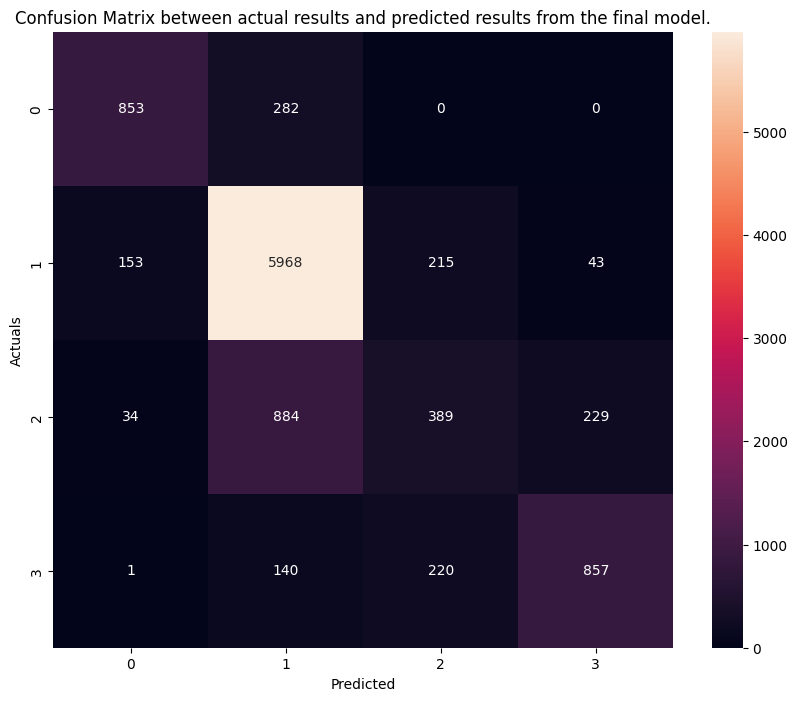

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.title('Confusion Matrix between actual results and predicted results from the final model.')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

# Prediction from unseen data:

In [ ]:
a3 = pd.read_csv("https://raw.githubusercontent.com/Ranjith98788/python/refs/heads/main/Unseen_Dataset.csv")

In [ ]:
cols_in_df = list(df.columns)
cols_in_a3 = list(a3.columns)

In [ ]:
common_cols = list(set(a3.columns) & set(cols_in_df))

In [ ]:
df_unseen = a3[common_cols]

In [ ]:
df_unseen['MARITALSTATUS'].unique()
df_unseen['EDUCATION'].unique()
df_unseen['GENDER'].unique()
df_unseen['last_prod_enq2'].unique()
df_unseen['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

### Label encoding for EDUCATION feature:

In [ ]:
df_unseen.loc[df_unseen['EDUCATION'] == 'SSC',['EDUCATION']]              =1
df_unseen.loc[df_unseen['EDUCATION'] == '12TH',['EDUCATION']]             =2
df_unseen.loc[df_unseen['EDUCATION'] == 'GRADUATE',['EDUCATION']]         =3
df_unseen.loc[df_unseen['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   =3
df_unseen.loc[df_unseen['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    =4
df_unseen.loc[df_unseen['EDUCATION'] == 'OTHERS',['EDUCATION']]           =1
df_unseen.loc[df_unseen['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     =3

In [ ]:
df_unseen.value_counts()
df_unseen['EDUCATION'] = df_unseen['EDUCATION'].astype(int)
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home_TL                    100 non-null    int64  
 1   num_dbt                    100 non-null    int64  
 2   last_prod_enq2             100 non-null    object 
 3   PL_TL                      100 non-null    int64  
 4   num_std_12mts              100 non-null    int64  
 5   num_dbt_12mts              100 non-null    int64  
 6   PL_Flag                    100 non-null    int64  
 7   CC_enq_L12m                100 non-null    int64  
 8   recent_level_of_deliq      100 non-null    int64  
 9   max_recent_level_of_deliq  100 non-null    int64  
 10  NETMONTHLYINCOME           100 non-null    int64  
 11  Time_With_Curr_Empr        100 non-null    int64  
 12  pct_tl_closed_L12M         100 non-null    float64
 13  first_prod_enq2            100 non-null    object 


<ipython-input-89-9a598152486e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unseen['EDUCATION'] = df_unseen['EDUCATION'].astype(int)


### One-hot encoding for remaining categorical features:

In [ ]:
df_unseen_encoded = pd.get_dummies(df_unseen, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'],drop_first=True)

In [ ]:
df_unseen_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home_TL                       100 non-null    int64  
 1   num_dbt                       100 non-null    int64  
 2   PL_TL                         100 non-null    int64  
 3   num_std_12mts                 100 non-null    int64  
 4   num_dbt_12mts                 100 non-null    int64  
 5   PL_Flag                       100 non-null    int64  
 6   CC_enq_L12m                   100 non-null    int64  
 7   recent_level_of_deliq         100 non-null    int64  
 8   max_recent_level_of_deliq     100 non-null    int64  
 9   NETMONTHLYINCOME              100 non-null    int64  
 10  Time_With_Curr_Empr           100 non-null    int64  
 11  pct_tl_closed_L12M            100 non-null    float64
 12  Tot_TL_closed_L12M            100 non-null    int64  
 13  Other_

In [ ]:
df_unseen_encoded.head()

,Home_TL,num_dbt,PL_TL,num_std_12mts,num_dbt_12mts,PL_Flag,CC_enq_L12m,recent_level_of_deliq,max_recent_level_of_deliq,NETMONTHLYINCOME,...,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0,0,4,11,0,1,0,29,29,51000,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0,0,0,0,0,19000,...,False,True,False,False,False,False,True,False,False,False
2,0,0,0,10,0,0,0,25,25,18,...,False,True,False,False,False,False,False,False,False,True
3,0,0,0,16,0,0,0,0,0,15000,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,2,0,0,1,26,270,0,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
df_encoded.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.0,0,0.00,0.0,0,0,0,4,1,...,False,False,False,True,False,False,False,False,True,False
1,0.000,0.0,0,1.00,0.0,0,0,0,0,0,...,False,True,False,False,False,False,True,False,False,False
2,0.125,0.0,0,0.25,0.0,1,0,0,0,2,...,False,True,False,False,False,False,False,False,False,True
3,1.000,0.0,0,1.00,0.0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
4,0.000,0.0,0,0.00,0.0,0,0,0,0,3,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_test_unseen = df_unseen_encoded

In [ ]:
x_test.shape

(10268, 50)

In [ ]:
x_test_unseen.shape

(100, 50)

Making all columns in unseen data and model data in the same order

In [ ]:
df_test=df_unseen_encoded[x_test.columns]

In [ ]:
y_pred_unseen=model.predict(df_test)


### Y prediction results from the unseen data:

In [ ]:
y_pred_unseen

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 2, 1, 1, 0, 3, 1, 0, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 2,
       3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1])

### Plot the distribution of predicted classes for the unseen data

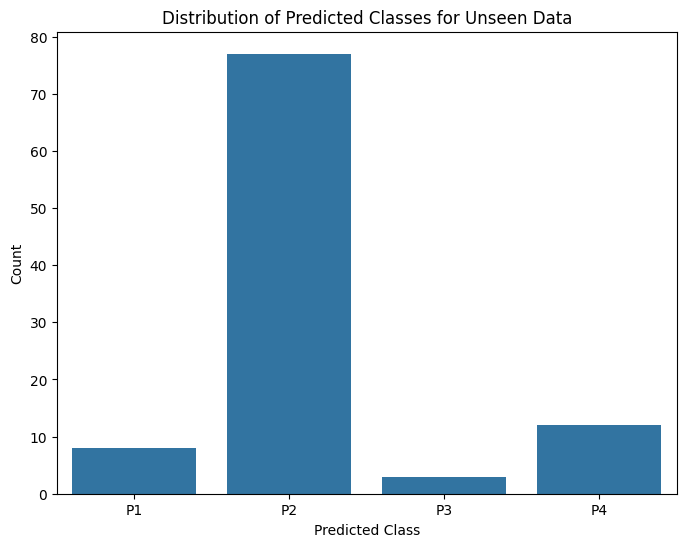

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred_unseen)
plt.title('Distribution of Predicted Classes for Unseen Data')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['P1', 'P2', 'P3', 'P4'])
plt.show()